Name : N.D. Liyanage

Index Number : 190356E

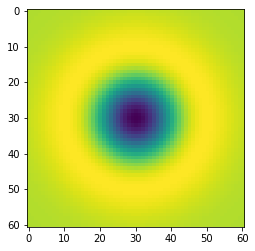

In [3]:
import numpy as np
import matplotlib.pyplot as plt 

sigma = 10
hw = 3*sigma
X, Y = np.meshgrid(np.arange(-hw, hw + 1, 1), np.arange(-hw, hw + 1, 1))

log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) + Y**2/(sigma**2)- 2)*np.exp(-(X**2+Y**2)/(2*sigma**2))

plt.imshow(log)
plt.show()

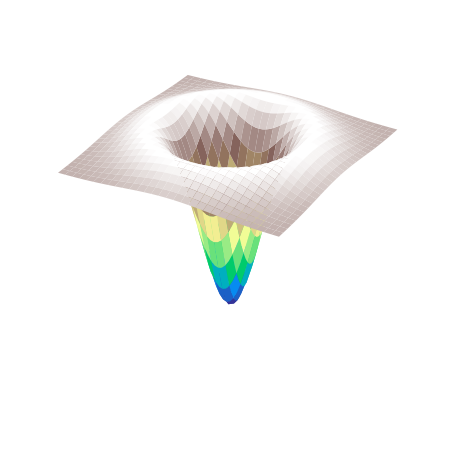

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X,Y, log, cmap=cm.terrain, linewidth = 0, antialiased = True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.axis('off')
plt.show()

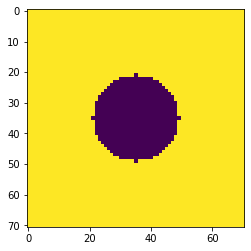

In [5]:
#Q2
#Generating the circle 
import numpy as np
import matplotlib.pyplot as plt 
import cv2 as cv

w, h = 71, 71
hw, hh = w//2, h//2

f = np.ones((h,w), dtype=np.float32)* 255

X, Y = np.meshgrid(np.arange(-hw, hw + 1, 1), np.arange(-hw, hw + 1, 1))
r = w//5 #14
f *= X**2 + Y**2 > r**2
plt.imshow(f)

(35, 35, 5)
10


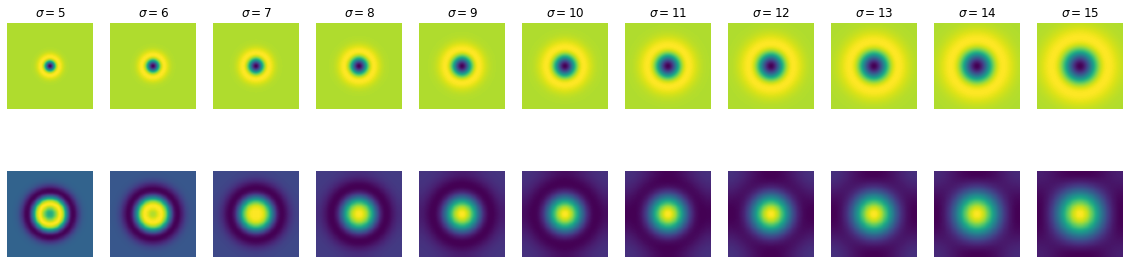

In [6]:
#Q2
s = 11
fig, ax = plt.subplots(2, s, figsize= (20,5))
scale_space = np.empty((h, w, s), dtype=np.float32)
sigmas = np.arange(5, 16, 1)
for i, sigma in enumerate (np.arange(5, 16, 1)):
    log_hw = 3*np.max(sigmas)
    X, Y = np.meshgrid(np.arange(-log_hw, log_hw + 1, 1), np.arange(-log_hw, log_hw + 1, 1))
    log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) + Y**2/(sigma**2)- 2)*np.exp(-(X**2 + Y**2)/(2*sigma**2))
    f_log = cv.filter2D(f, -1 , log)
    scale_space [:, :, i] = f_log
    ax[0, i].imshow(log)
    ax[0, i].axis('off')
    ax[0, i].set_title(r'$\sigma = {}$'.format(sigma))
    ax[1, i].imshow(f_log)
    ax[1, i].axis('off')

indices = np.unravel_index(np.argmax(scale_space, axis= None), scale_space.shape)
print(indices) # r= \sqrt{2}*sigma
print(sigmas[indices[2]])

Q2)
Maximum response occurs at, $\sigma = {}$ r/ $\sqrt{2}$.
That is same as the value above.


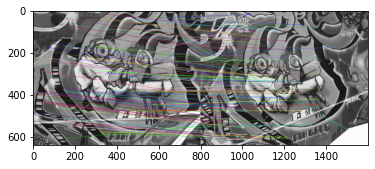

In [26]:
#Q3
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

# read images
img1 = cv.imread('./images/img1.ppm')  
img2 = cv.imread('./images/img2.ppm') 

img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

#sift
sift = cv.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:100], img2, flags=2)
plt.imshow(img3)
plt.show()

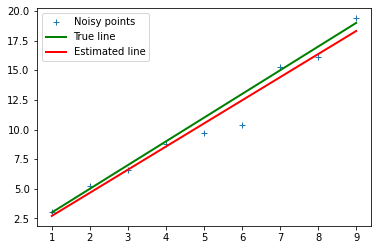

In [15]:
#Q4
#Least square line fittinge
import numpy as np
import matplotlib.pyplot as plt 
m = 2
c = 1
x = np.arange(1, 10, 1)
np.random.seed(45)
sigma = 1
noise = sigma*np.random.randn(len(x))
o = np.zeros(x.shape )
#o[-1] = 20
y = m*x + c + noise + o
n = len(x)
X = np.concatenate([x.reshape(n, 1), np.ones((n,1))], axis=1)
B = np.linalg.pinv(X.T @ X) @ X.T @ y
mstar = B[0]
cstar = B[1]
plt.plot(x,y, '+', label = 'Noisy points')
plt.plot([x[0], x[-1]], [m*x[0] + c, m*x[-1] + c], color = 'g', linewidth = 2, label = r'True line')
plt.plot([x[0], x[-1]], [mstar*x[0] + cstar, mstar*x[-1] + cstar], color = 'r', linewidth = 2, label = r'Estimated line')
plt.legend()
plt.show()

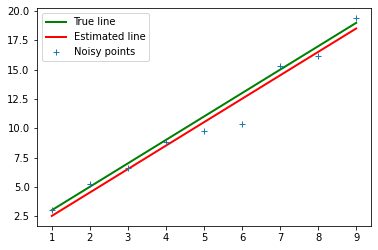

In [18]:
#Q5
import numpy as np
import matplotlib.pyplot as plt 
m = 2 
c = 1
x = np.arange(1, 10, 1)
noise = np.random.randn(len(x))
np.random.seed(45)
noise = np.random.randn(len(x))
o = np.zeros(x.shape )
y = m*x + c + noise + o

n = len(x)
u11 = np.sum((x - np.mean(x))**2)
u12 = np.sum((x - np.mean(x))*(y - np.mean(y)))
u21 = u12
u22 = np.sum((y - np.mean(y))**2)

U = np.array([[u11, u12], [u21, u22]])
W, V = np.linalg.eig(U)
ev_corresponding_to_smalest_ev = V[:, np.argmin(W)]

a = ev_corresponding_to_smalest_ev[0] 
b = ev_corresponding_to_smalest_ev[1]
d = a*np.mean(x) + b*np.mean(y)
mstar = -a/b
cstar = d/b

plt.plot([x[0], x[-1]], [m*x[0] + c, m*x[-1] + c], color = 'g', linewidth = 2, label = r'True line')
plt.plot([x[0], x[-1]], [mstar*x[0] + cstar, mstar*x[-1] + cstar], color = 'r', linewidth = 2, label = r'Estimated line')
plt.plot(x,y, '+', label = 'Noisy points')
plt.legend(loc= 'best')
plt.plot()
plt.show()
